<a href="https://www.kaggle.com/code/lucascabralarajo/coffee-shop-analysis?scriptVersionId=196415036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importação

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use("ggplot");

In [2]:
# Importando a base
df = pd.read_excel('/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx', sheet_name='Transactions')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


# Verificações Iniciais
* Temos dados faltantes?
* Temos dados duplicados?
* O formato de cada coluna está certo?
* Precisaremos tratar algum dado?

In [3]:
# Podemos ver que não temos dados faltantes na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

In [4]:
# Verificando se o DataFrame tem duplicadas
df.drop_duplicates(inplace=True)
df.shape

(149116, 17)

In [5]:
# Visualizando os padrões da base
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662


# Dúvidas iniciais
* Qual é o número de vendas por mês?
* Qual é o horário com maior número de vendas?
* Qual é o produto mais vendido?
* Qual é a categoria de produto que traz a maior receita?
* Qual é a receita média por cada tipo de produto? E por região?
* Quais são as lojas que trazem mais ou menos receita?
* Existe algum padrão nos horários das transações, seja por produto, loja ou região?

## Análisando a distribuição das vendas

<Figure size 1200x600 with 0 Axes>

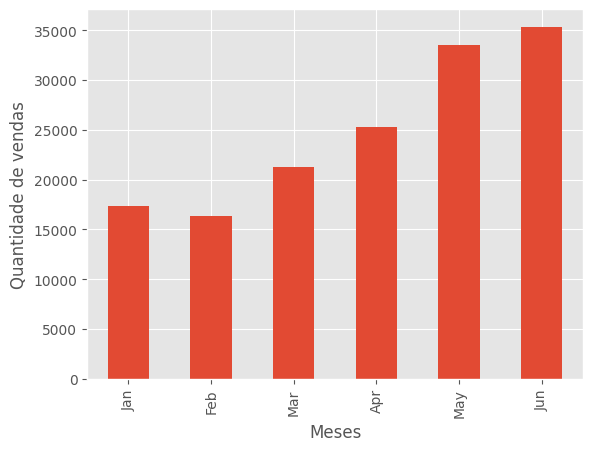

In [6]:
# Análisando a quantidade de vendas
# Criando uma pivot table das vendas por mês
vendas = pd.pivot_table(df,
              values=['transaction_qty', 'Month.1'],
              index='Month',
              aggfunc={'transaction_qty': 'count', 'Month.1': 'min'})

# Renomeando as colunas
vendas.columns = ['Meses', 'Quantidade de Vendas']
vendas = vendas.sort_values(by='Month', ascending=True)

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
ax = vendas.plot.bar(x='Meses', y='Quantidade de Vendas')

# Colocando a legenda do gráfico
ax.set_xlabel('Meses')
ax.set_ylabel('Quantidade de vendas')
ax.legend().remove()
plt.show()

<Figure size 1200x600 with 0 Axes>

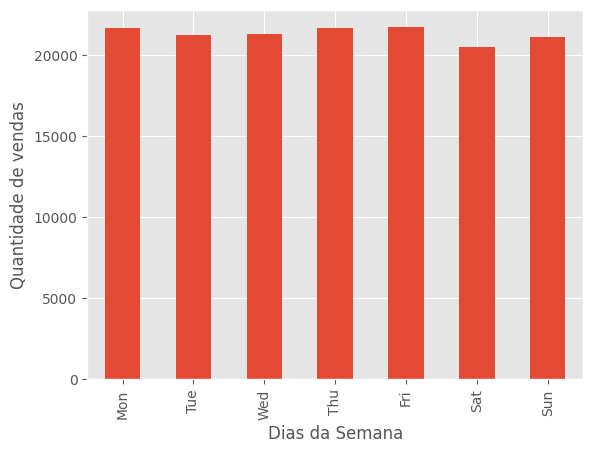

In [7]:
# Análisando a quantidade de vendas
# Criando uma pivot table das vendas por dia da semana
vendas = pd.pivot_table(df,
              values=['transaction_qty', 'Weekday.1'],
              index='Weekday',
              aggfunc={'transaction_qty': 'count', 'Weekday.1': 'min'})

# Renomeando as colunas
vendas.columns = ['Dia da Semana', 'Quantidade de Vendas']
vendas = vendas.sort_values(by='Weekday', ascending=True)

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
ax = vendas.plot.bar(x='Dia da Semana', y='Quantidade de Vendas')

# Colocando a legenda do gráfico
ax.set_xlabel('Dias da Semana')
ax.set_ylabel('Quantidade de vendas')
ax.legend().remove()
plt.show()

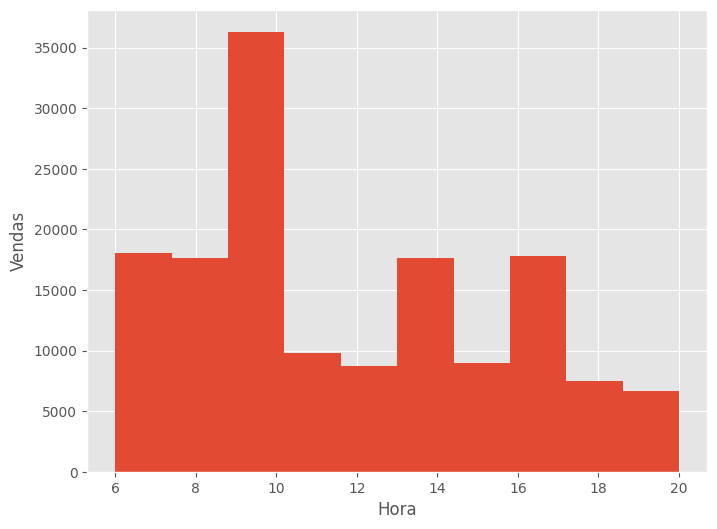

In [8]:
# Análisando os horários com o maior número de vendas
plt.figure(figsize=(8, 6))

ax = df['Hour'].plot(kind='hist', bins=10)

ax.set_xlabel('Hora')
ax.set_ylabel('Vendas')
plt.show()

### Verificando o produto mais vendido

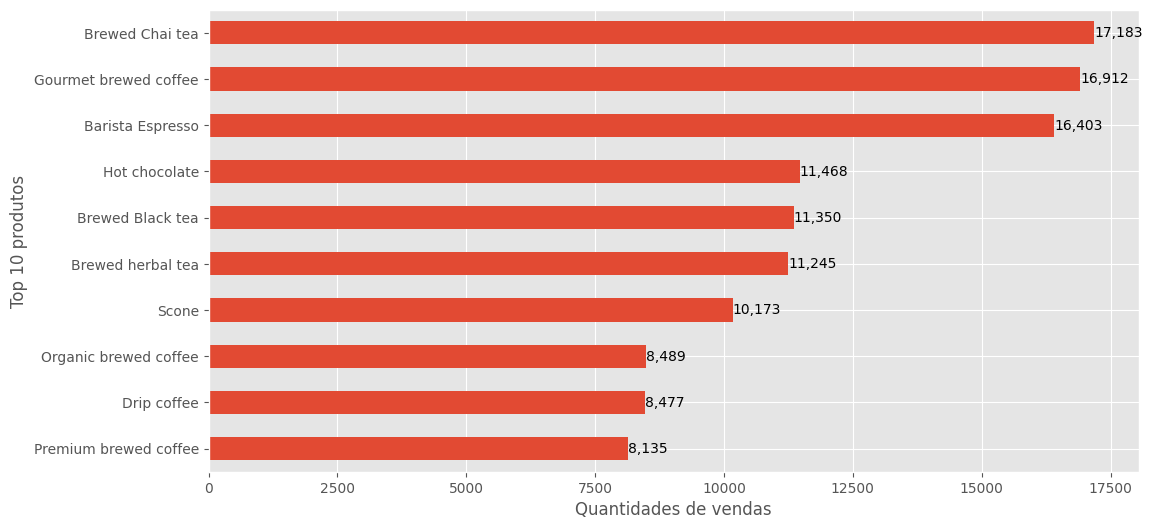

In [9]:
# Verificando o produto mais vendido
# Criando uma pivot_table dos produtos mais vendidos
pivot = pd.pivot_table(df,
              values=['Revenue'],
              index='product_type',
              aggfunc={'Revenue': 'count'})
pivot = pivot.nlargest(10, 'Revenue')
pivot = pivot.sort_values(by='Revenue', ascending=False)

# Criando o gráfico
ax = pivot.plot(kind='barh', figsize=(12,6))

# Colocando a legenda dos eixos no gráfico
ax.set_ylabel('Top 10 produtos')
ax.set_xlabel('Quantidades de vendas')
for container in ax.containers:
    labels = [f'{(val):,}' for val in container.datavalues]
    ax.bar_label(container, label_type='edge', labels=labels, color='k')

# Configurações finais do plot
ax.invert_yaxis()
ax.legend().remove()
plt.savefig("produtos_mais_vendidos.png")
plt.show()

### Verificando a categoria com mais receita

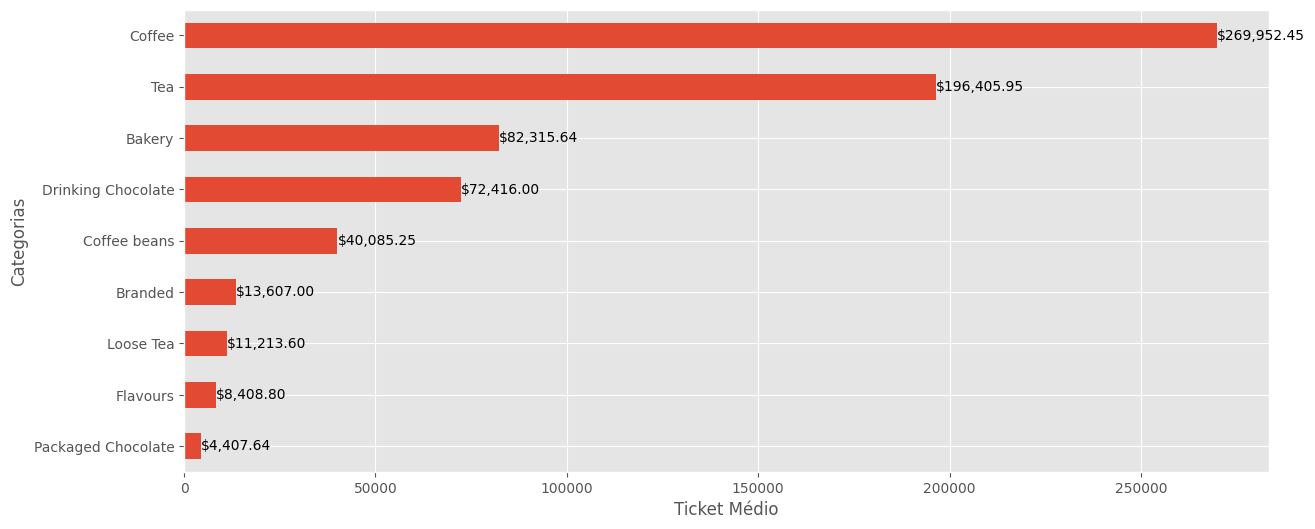

In [10]:
# Verificando a categoria com mais receita
# Criando uma pivot_table da receita por categoria
product_pvt = pd.pivot_table(df,
              values='Revenue',
              index='product_category', aggfunc='sum')

# Ordenando a pivot_table
product_pvt = product_pvt.sort_values(by='Revenue', ascending=False)

# Formatando a receita
product_pvt_styled = product_pvt.style.format({
    'Revenue': '$ {:,.2f}'})

# Criando o gráfico da receita por categoria
# plt.figure(figsize=(16, 6))
ax = product_pvt.plot(kind='barh', figsize=(14,6))

# Rótulo de dados
for container in ax.containers:
    labels = [f'${val:,.2f}' for val in container.datavalues]
    ax.bar_label(container, label_type='edge', labels=labels, color='k')
    
# Configurações finais do gráfico    
ax.invert_yaxis()
ax.set_xlabel('Ticket Médio')
ax.set_ylabel('Categorias')
ax.get_legend().remove()

plt.show()

<Figure size 1000x600 with 0 Axes>

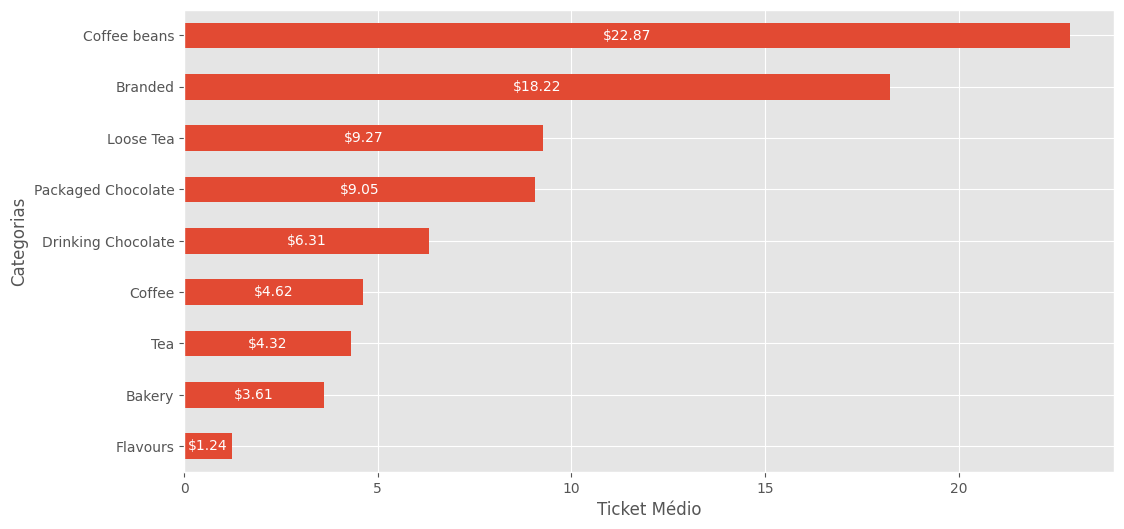

In [11]:
# Verificando o ticket médio de cada categoria
# Criando uma pivot_table da receita por categoria
pivot = pd.pivot_table(df,
              values='Revenue',
              index='product_category', aggfunc='mean')

# Ordenando a pivot_table pelo ticket médio
pivot = pivot.sort_values(by='Revenue', ascending=False)

# Formatando a receita
product_pvt = pivot.style.format({
    'Revenue': '$ {:,.2f}' })

# Criando o gráfico do ticket médio de cada categoria
plt.figure(figsize=(10, 6))
ax = pivot.plot(kind='barh', figsize=(12,6))

# Rótulo de dados
for container in ax.containers:
    labels = [f'${val:,.2f}' for val in container.datavalues]
    ax.bar_label(container, label_type='center', labels=labels, color="w")
    
# Configurações finais do gráfico 
ax.invert_yaxis()
ax.set_xlabel('Ticket Médio')
ax.set_ylabel('Categorias')
ax.get_legend().remove()
plt.savefig("ticket_medio.png")

<Figure size 2000x600 with 0 Axes>

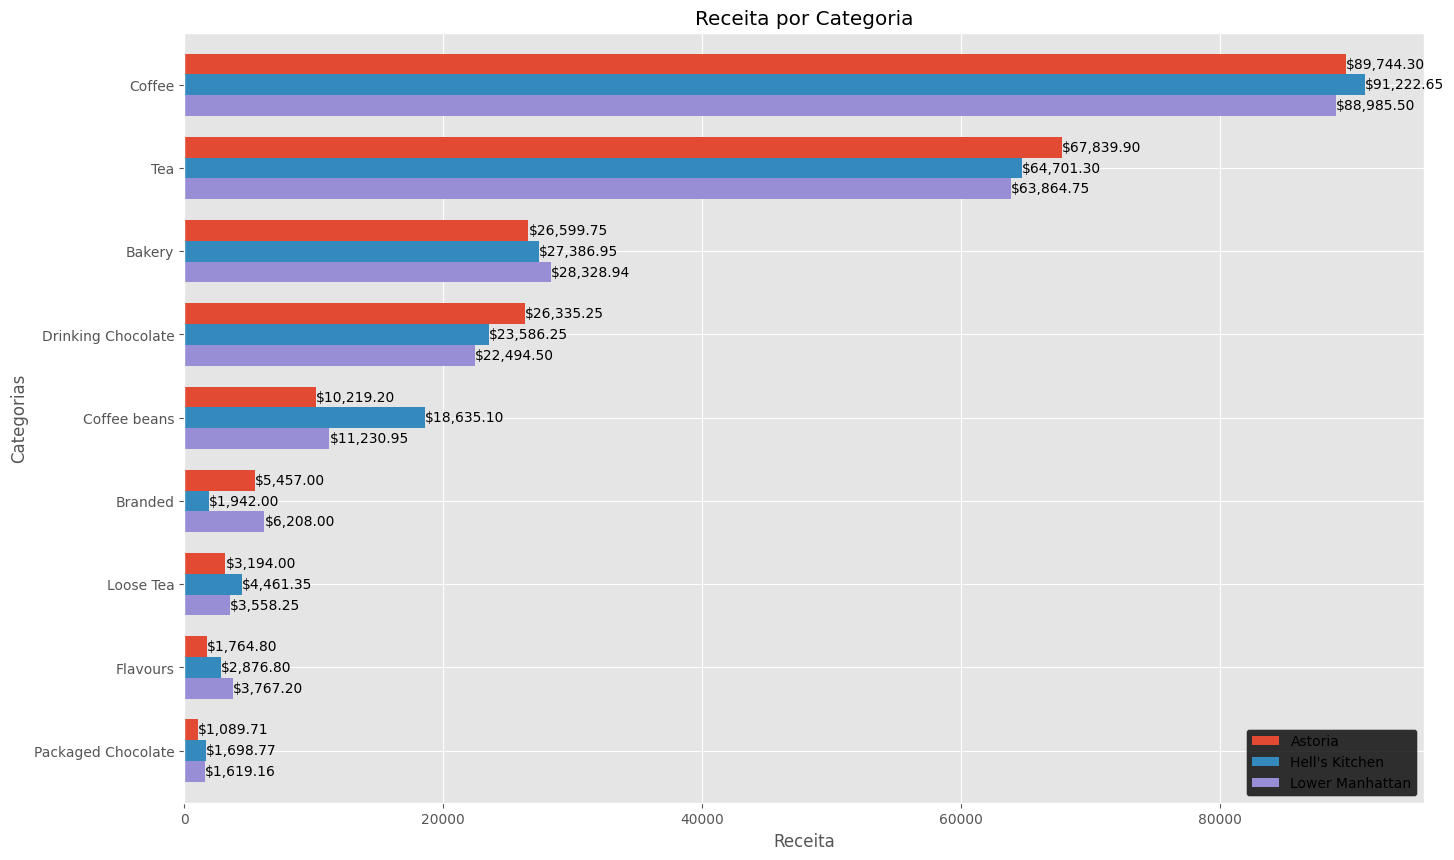

In [12]:
# Verificando a venda por categoria em cada região
# Criando uma pivot_table da receita por loja
product_pvt = pd.pivot_table(df,
              values='Revenue',
              columns=['store_location'],
              index='product_category', aggfunc='sum')
product_pvt['Total'] = product_pvt.sum(axis=1)

# Ordenando a pivot_table pelo receita total
product_pvt = product_pvt.sort_values(by='Total', ascending=False)
product_pvt = product_pvt.drop('Total', axis=1) 

# Criando o gráfico do ticket médio por categoria
plt.figure(figsize=(20, 6))
ax = product_pvt.plot(kind='barh', figsize=(16,10), width=0.75)

# Rótulo de dados
for container in ax.containers:
    labels = [f'${val:,.2f}' for val in container.datavalues]
    ax.bar_label(container, label_type='edge', labels=labels, color='k')
    
# Configurações finais do gráfico
ax.invert_yaxis()
ax.set_title('Receita por Categoria', color='black')
ax.set_xlabel('Receita')
ax.set_ylabel('Categorias')
ax.legend(loc='lower right', frameon=True, facecolor='black', edgecolor='lightgray')
plt.show()

<Figure size 1400x600 with 0 Axes>

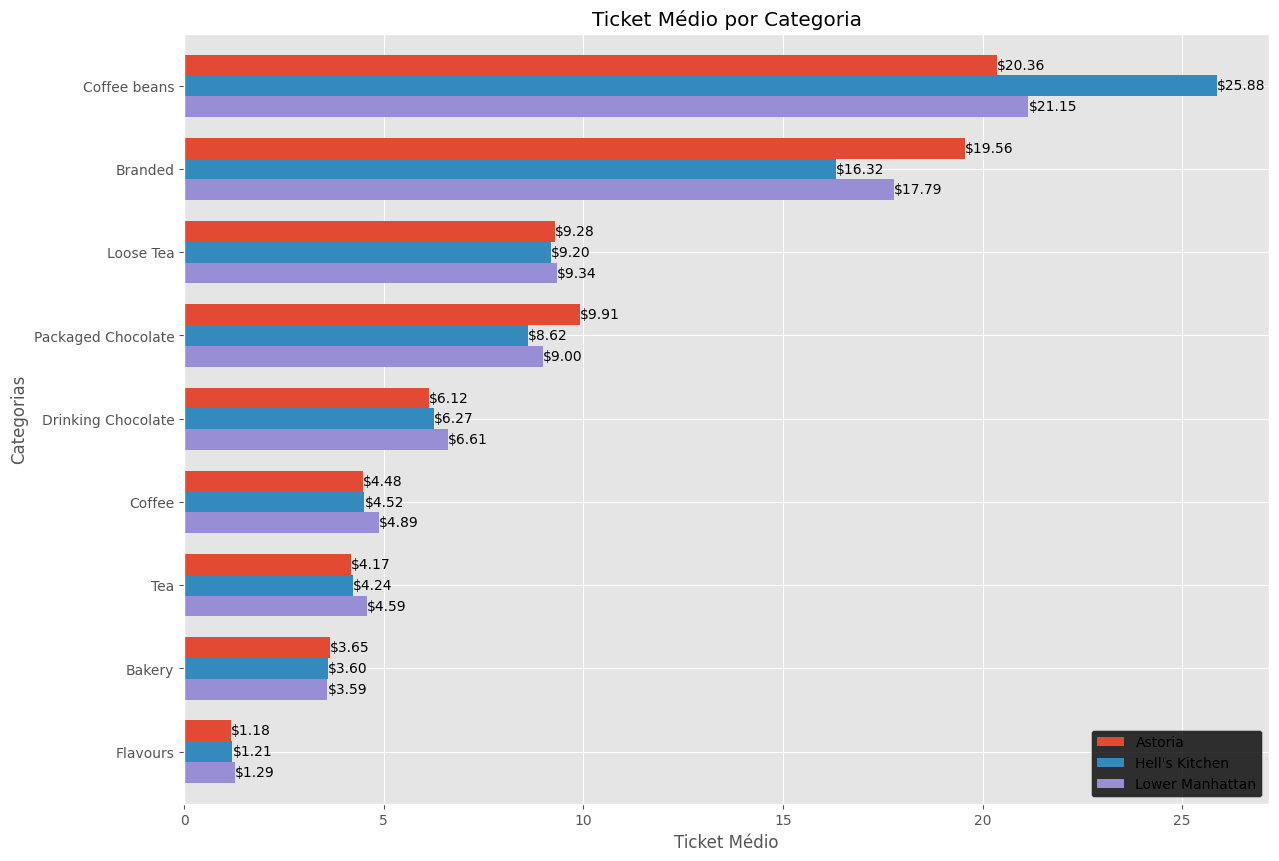

In [13]:
# Verificando o ticket médio por categoria em cada região
# Criando uma pivot_table do ticket médio por categoria em cada região
product_pvt = pd.pivot_table(df,
              values='Revenue',
              columns=['store_location'],
              index='product_category', aggfunc='mean')

# Criando a coluna com o ticket médio
product_pvt['Ticket Médio'] = product_pvt.mean(axis=1)

# Ordenando pelo ticket médio
product_pvt = product_pvt.sort_values(by='Ticket Médio', ascending=False)

product_pvt = product_pvt.drop('Ticket Médio',axis=1)

# Formatando o valor do ticket médio
product_pvt_styled = product_pvt.style.format({
    'Astoria': '$ {:,.2f}', "Hell's Kitchen": '$ {:,.2f}', 'Lower Manhattan': '$ {:,.2f}'})

# Criando o gráfico do ticket médio por categoria
plt.figure(figsize=(14, 6))
ax = product_pvt.plot(kind='barh', figsize=(14,10), width=0.75)

# Rótulo de dados
for container in ax.containers:
    labels = [f'${val:,.2f}' for val in container.datavalues]
    ax.bar_label(container, label_type='edge', labels=labels, color='k')
    
# Configurações finais do gráfico
ax.invert_yaxis()
ax.set_title('Ticket Médio por Categoria', color='black')
ax.set_xlabel('Ticket Médio')
ax.set_ylabel('Categorias')
ax.legend(loc='lower right', frameon=True, facecolor='black', edgecolor='lightgray')
plt.show()

In [14]:
# Verificando as vendas por categoria em cada região
store_pvt = pd.pivot_table(df,
              index='store_location',
              values='Revenue',
              columns='Month.1',
              aggfunc='sum')
# Criando uma coluna com o total da receita
store_pvt['Total'] = store_pvt.sum(axis=1)
store_pvt = store_pvt
# Ordenando pela receita
store_pvt = store_pvt.sort_values('Total', ascending=False)
# Ordenando os meses
order = ['Jan','Feb','Mar','Apr','May','Jun', 'Total']
store_pvt = store_pvt[order]
# Formatando o valor da receita
store_pvt_styled = store_pvt.style.format({
    'Jan': '$ {:,.2f}', 
    'Feb': '$ {:,.2f}',
    'Mar': '$ {:,.2f}',
    'May': '$ {:,.2f}',
    'Jun': '$ {:,.2f}',
    'Apr': '$ {:,.2f}',
    'Total': '$ {:,.2f}'
})
store_pvt_styled

Month.1,Jan,Feb,Mar,Apr,May,Jun,Total
store_location,,,,,,,
Hell's Kitchen,"$ 27,820.65","$ 25,719.80","$ 33,110.57","$ 40,304.14","$ 52,598.93","$ 56,957.08","$ 236,511.17"
Astoria,"$ 27,313.66","$ 25,105.34","$ 32,835.43","$ 39,477.61","$ 52,428.76","$ 55,083.11","$ 232,243.91"
Lower Manhattan,"$ 26,543.43","$ 25,320.05","$ 32,888.68","$ 39,159.33","$ 51,700.07","$ 54,445.69","$ 230,057.25"
